In [1]:
# Chapter 14. Trees and Forests

In [14]:
# 14.1 Training a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# make new observation
observation = [[5, 4, 3, 2]]

# Predict observation's class
print(model.predict(observation))

# View predicted class probabilities for the three classes
print(model.predict_proba(observation))

[1]
[[0. 1. 0.]]


In [16]:
# Create decision tree classifier object using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train model
model_entropy = decisiontree_entropy.fit(features, target)

# Predict observation's class
print(model_entropy.predict(observation))

# View predicted class probabilities for the three classes
print(model_entropy.predict_proba(observation))

[1]
[[0. 1. 0.]]


In [ ]:
# 14.2 Training a Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load data with only two features
diabetes = datasets.load_diabetes()
features, target = diabetes.data, diabetes.target

# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)

# Make new observation
observation = [features[0]]

# Predict observation's value
print(model.predict(observation))

[151.]


In [20]:
target[0]

np.float64(151.0)

In [35]:
# Create decision tree classifier object using MAE
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

# Train model
model_mae = decisiontree_mae.fit(features, target)

# Predict observation's value
print(model_mae.predict(observation))

[1.]


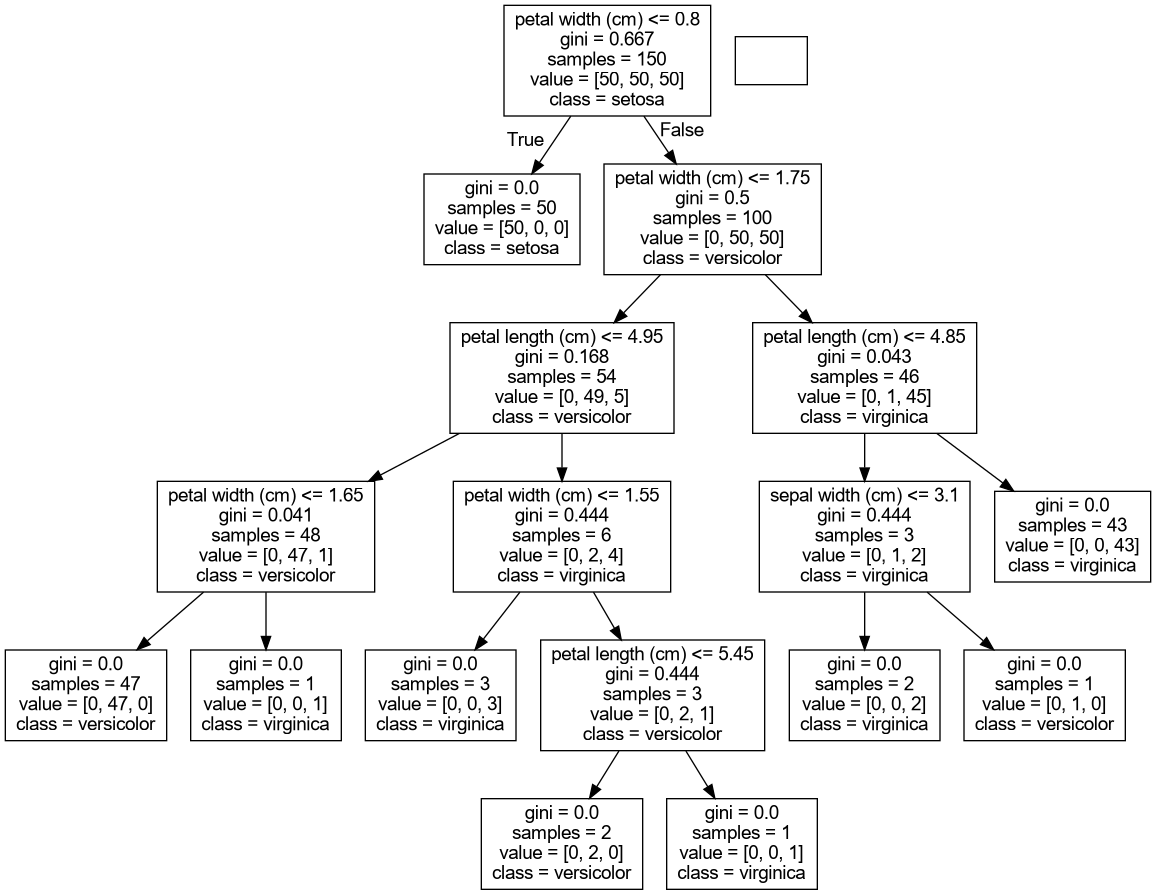

In [28]:
# 14.3 Visualizing a Decision Tree Model
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree


iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# train model
model = decisiontree.fit(features, target)
 
# Create DOT data
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# show graph
Image(graph.create_png())

In [29]:
# create a pdf
graph.write_pdf("iris.pdf")

True

In [30]:
# create PNG
graph.write_png("iris.png")

True

In [ ]:
# 14.4 Training a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier object
ransomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# train model
model = ransomforest.fit(features, target)

# make new observation
observation = [[5, 4, 3, 2]]

# Predict observation's class
model.predict(observation)

array([1])

In [ ]:
# Create random forest classifier object using entropy
ransomforest_entropy  = RandomForestClassifier(criterion="entropy", random_state=0)

# train model
model_entropy = ransomforest_entropy.fit(features, target)

In [39]:
# 14.5 Training a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

# Load data with only two features
diabetes = datasets.load_diabetes()
features, target = diabetes.data, diabetes.target

# Create random forest regressor object
ransomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

# train model
model = ransomforest.fit(features, target)

observation = [features[1]]

model.predict(observation)

array([80.84])

In [40]:
target[1]

np.float64(75.0)

In [45]:
# 14.6 Evaluating Random Forests with Out-of-Bag Errors
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier object
randonforest = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True,
                                      n_jobs=-1)

# train model
model = randonforest.fit(features, target)

# view out of bag error
randonforest.oob_score_

0.9533333333333334

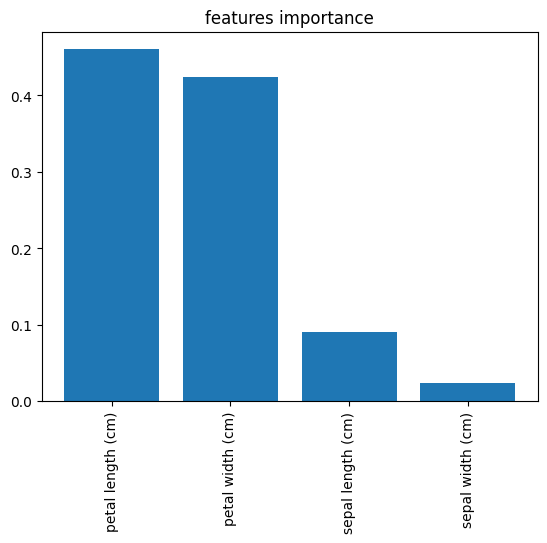

In [59]:
# 14.7 Identifying Important Features in Random Forests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier object
randonforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = randonforest.fit(features,target)

# Calculate feature importances
importances = model.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]

# create plot
plt.figure()

# create plot tittle
plt.title("features importance")

# add bars
plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation = 90)

plt.show()

In [60]:
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [61]:
names

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

In [ ]:
# 14.8 Selecting Important Features in Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Create object that selects features with importance greater than 
# or equal to a threshold

selector = SelectFromModel(randomforest, threshold=0.3)

# Create new feature matrix using selector
features_important = selector.fit_transform(features, target)

# Train random forest using most important features
model = randomforest.fit(features_important, target)

In [67]:
# 14.9 Handling Imbalanced Classes

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target

# Make class highly imbalanced by removing first 40 observations
features = features[40: , :]
target = target[40:]

# Create target vector indicating if class 0, otherwise 1
target = np.where((target == 0), 0, 1)

# create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")

# train model
model = randomforest.fit(features, target)

In [68]:
#  page 253 formula
# # Calculate weight for small class
110/(2*10)

5.5

In [69]:
# Calculate weight for large class
110/(2*100)

0.55

In [ ]:
# 14.10 Controlling Tree Size
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features, target = iris.data, iris.target
